In [2]:
import pd
from mp_api.client import MPRester
import pandas as pd
from sympy.physics.units import voltage

df9 = pd.read_json("/Users/omarabdelhamid/Downloads/battery-v2/battery-2022.json")

df9.head()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Property,Name,Value,Raw_unit,Raw_value,Unit,Extracted_name,DOI,Specifier,Tag,Warning,Type,Info,name,value,Title,Journal,Date,Correctness
0,Coulombic Efficiency,NVP @ C,96.0,%,98 96,Percent^(1.0),"[{'N': '1.0', 'V': '1.0', 'P': '1.0'}, {'C': '...",10.1039/C7SE00537G,coulombic efficiencies,CDE,None,None,None,[NVP @ C],"[98.0, 96.0]",Stability enhancing ionic liquid hybrid electr...,Sustainable Energy & Fuels,2018/02/27,None
1,Voltage,Zn / / MnO2,1.4,V,1.4,Volt^(1.0),"[{'Zn': '1.0'}, {'Mn': '1.0', 'O': '2.0'}]",10.1039/C7TA10936A,voltage,CDE,None,None,None,[Zn / / MnO2],[1.4],"High performance, environmentally benign and i...",Journal of Materials Chemistry A,2018/02/27,None
2,Capacity,MnOx / carbon,648.9,mAhg−1,"648.9 , 580.8 , 586.4 , and 90.6",Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),"[{'Mn': '1.0', 'O': 'x'}]",10.1016/j.jpowsour.2012.05.092,charge capacities,CDE,None,None,None,[MnOx / carbon],"[648.9, 580.8, 586.4, 90.6]",INFLUENCEMNCONTENTMORPHOLOGYIMPROVEDELECTROCHE...,Journal of Power Sources,2012-06-01,None
3,Capacity,MoS2,650.0,mAhg−1,650 – 1675,Gram^(-1.0) Hour^(1.0) MilliAmpere^(1.0),"[{'Mo': '1.0', 'S': '2.0'}]",10.1016/j.energy.2017.01.096,reversible specific capacity,CDE,None,None,None,[MoS2],"[650.0, 1675.0]",LIFECYCLEASSESSMENTHIGHCAPACITYMOLYBDENUMDISUL...,Energy,2017-01-23,None
4,Voltage,ZnCo2O4-C,3.0,V vs. Li,0.01 to 3.0,Volt^(1.0),"[{'Zn': '1.0', 'Co': '2.0', 'O': '4.0'}]",10.1007/s11581-019-03281-1,voltage,CDE,None,None,None,[ZnCo2O4-C],"[0.01, 3.0]",Citrate-directed hydrothermal synthesis of ZnC...,Ionics,"[26, 10, 2019]",None


In [3]:
df9.info()
df9.describe()

"""
Coulombic Efficiency (CE) measures how efficiently a battery stores and releases charge, calculated as the ratio of discharged capacity to charged capacity in a cycle (Discharge Capacity / Charge Capacity). A value near 100% (e.g., 99%+) indicates high reversibility and longer battery life, meaning fewer lithium ions are lost to side reactions
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231345 entries, 0 to 231344
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Property        231345 non-null  object 
 1   Name            231345 non-null  object 
 2   Value           231345 non-null  float64
 3   Raw_unit        231345 non-null  object 
 4   Raw_value       231345 non-null  object 
 5   Unit            231345 non-null  object 
 6   Extracted_name  231345 non-null  object 
 7   DOI             231345 non-null  object 
 8   Specifier       231345 non-null  object 
 9   Tag             231345 non-null  object 
 10  Warning         231345 non-null  object 
 11  Type            231345 non-null  object 
 12  Info            231345 non-null  object 
 13  name            231345 non-null  object 
 14  value           231345 non-null  object 
 15  Title           231345 non-null  object 
 16  Journal         231345 non-null  object 
 17  Date      

,Value
count,231345.000000
mean,307.202374
std,458.283166
min,0.000000
25%,4.000000
50%,128.400000
75%,428.000000
max,12918.640000


In [6]:
df = pd.read_json("/Users/omarabdelhamid/Downloads/battery-v2/battery-2022.json")
df = pd.json_normalize(df.to_dict(orient="records"))
voltage = df[df["Property"] == "Voltage"]

voltage.head(18)

,Property,Name,Value,Raw_unit,Raw_value,Unit,Extracted_name,DOI,Specifier,Tag,...,name,value,Title,Journal,Date,Correctness,Info.current_value,Info.current_units,Info.cycle_value,Info.cycle_units
1,Voltage,Zn / / MnO2,1.400,V,1.4,Volt^(1.0),"[{'Zn': '1.0'}, {'Mn': '1.0', 'O': '2.0'}]",10.1039/C7TA10936A,voltage,CDE,...,[Zn / / MnO2],[1.4],"High performance, environmentally benign and i...",Journal of Materials Chemistry A,2018/02/27,None,NaN,NaN,NaN,NaN
4,Voltage,ZnCo2O4-C,3.000,V vs. Li,0.01 to 3.0,Volt^(1.0),"[{'Zn': '1.0', 'Co': '2.0', 'O': '4.0'}]",10.1007/s11581-019-03281-1,voltage,CDE,...,[ZnCo2O4-C],"[0.01, 3.0]",Citrate-directed hydrothermal synthesis of ZnC...,Ionics,"[26, 10, 2019]",None,NaN,NaN,NaN,NaN
7,Voltage,V6O13,0.800,V,− 0.2 to 0.8,Volt^(1.0),"[{'V': '6.0', 'O': '13.0'}]",10.1039/D0SE00897D,voltage,CDE,...,[V6O13 electrode],"[0.2, 0.8]",Recent advances in vanadium-based nanomaterial...,Sustainable Energy & Fuels,2020/09/29,None,NaN,NaN,NaN,NaN
21,Voltage,Li1+xAlxTi2−x(PO4)3,4.200,V,4.2,Volt^(1.0),"[{'P': '3.0', 'O': '12.0', 'Li': 'x+1', 'Al': ...",10.1016/j.jpowsour.2018.03.076,voltage,CDE,...,"[LATP, Li1+xAlxTi2−x(PO4)3]",[4.2],SURFACEPROTECTEDLICOO2ULTRATHINSOLIDOXIDEELECT...,Journal of Power Sources,2018-04-02,None,NaN,NaN,NaN,NaN
26,Voltage,AgCl,0.500,V vs. Ag,0.5,Volt^(1.0),"[{'Ag': '1.0', 'Cl': '1.0'}]",10.1039/C4TA06553K,potential,CDE,...,[AgCl],[0.5],Ni 0.31 Co 0.69 S 2 nanoparticles uniformly an...,Journal of Materials Chemistry A,2015/02/17,None,NaN,NaN,NaN,NaN
28,Voltage,LiNi0.5Mn1.5O4,3.500,V,4.8 and 3.5,Volt^(1.0),"[{'Li': '1.0', 'Ni': '0.5', 'Mn': '1.5', 'O': ...",10.1039/C2RA20669B,voltage,CDE,...,"[LNMO, LiNi0.5Mn1.5O4]","[4.8, 3.5]",Facile polymer -assisted synthesis of LiNi 0.5...,RSC Advances,2012/06/13,None,NaN,NaN,NaN,NaN
35,Voltage,Li1.95Mg0.05Na2Ti6O14,1.100,V,1.1 to 0.7,Volt^(1.0),"[{'Li': '1.95', 'Mg': '0.05', 'Na': '2.0', 'Ti...",10.1016/j.electacta.2016.03.035,voltage,CDE,...,[Li1.95Mg0.05Na2Ti6O14],"[1.1, 0.7000000000000001]",ENHANCEDELECTROCHEMICALPROPERTIESMG2DOPEDLI2NA...,Electrochimica Acta,2016-03-09,None,NaN,NaN,NaN,NaN
36,Voltage,Li1.2Mn0.57Ni0.2O2,0.559,V,and 0.559,Volt^(1.0),"[{'Li': '1.2', 'Mn': '0.57', 'Ni': '0.2', 'O':...",10.1016/j.jcis.2020.03.005,voltage,CDE,...,"[Li1.2Mn0.55Ni0.2O2, Li1.2Mn0.59Ni0.2O2, Li1.2...",[0.559],NONSTOICHIOMETRYLIRICHCATHODEMATERIALIMPROVEDC...,Journal of Colloid and Interface Science,2020-03-03,None,NaN,NaN,NaN,NaN
39,Voltage,HHPC-Ca,1.620,V,1.62,Volt^(1.0),"[{'H': '2.0', 'P': '1.0', 'C': '1.0'}]",10.1016/j.apcatb.2020.118603,None,CDE,...,[HHPC-Ca],[1.62],ROBUSTTEMPLATEACTIVATORCOOPERATEDPYROLYSISENAB...,Applied Catalysis B: Environmental,2020-01-09,None,NaN,NaN,NaN,NaN
46,Voltage,AgCl,1.400,V vs. Ag,– 1.4,Volt^(1.0),"[{'Ag': '1.0', 'Cl': '1.0'}]",10.1016/j.jpowsour.2012.10.016,voltage,CDE,...,[AgCl],[1.4],IDENTIFICATIONPERFORMANCELIMITINGELECTRODEUSIN...,Journal of Power Sources,2012-10-16,None,NaN,NaN,NaN,NaN


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x117718fe0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

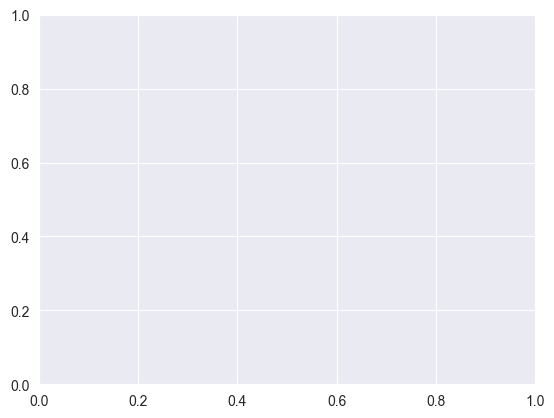

In [10]:
import matplotlib.pyplot as plt

voltage['value'].hist(bins=30)
plt.xlabel("Voltage (V)")
plt.ylabel("Frequency")
plt.title("Voltage levels ")
plt.show()